In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:11<00:00, 120MB/s]
100% 1.06G/1.06G [00:11<00:00, 99.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 111ms/step - loss: 1.3143 - accuracy: 0.6022 - val_loss: 0.5950 - val_accuracy: 0.6900
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5759 - accuracy: 0.7075 - val_loss: 0.5161 - val_accuracy: 0.7462
Epoch 3/10
625/625 [==============================] - 71s 113ms/step - loss: 0.5016 - accuracy: 0.7613 - val_loss: 0.5630 - val_accuracy: 0.7268
Epoch 4/10
625/625 [==============================] - 70s 112ms/step - loss: 0.4369 - accuracy: 0.8005 - val_loss: 0.5523 - val_accuracy: 0.7090
Epoch 5/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4070 - accuracy: 0.8209 - val_loss: 0.4372 - val_accuracy: 0.7998
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3248 - accuracy: 0.8618 - val_loss: 0.5547 - val_accuracy: 0.7878
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2458 - accuracy: 0.8975 - val_loss: 0.4609 - val_ac

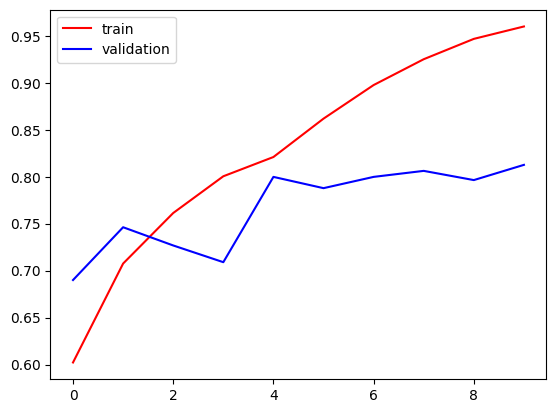

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()



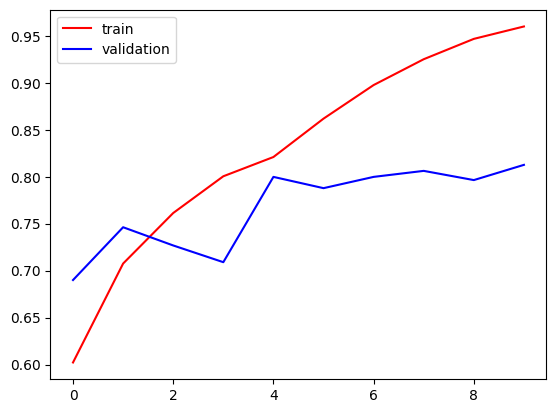

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

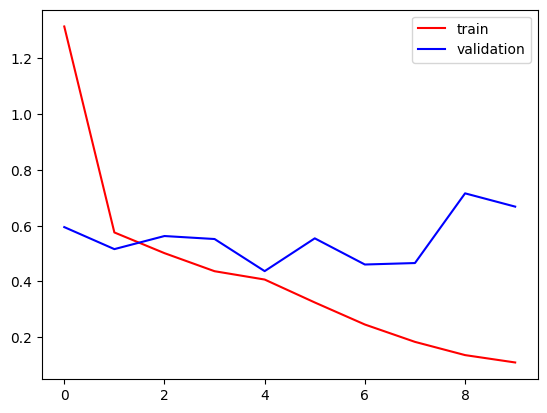

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

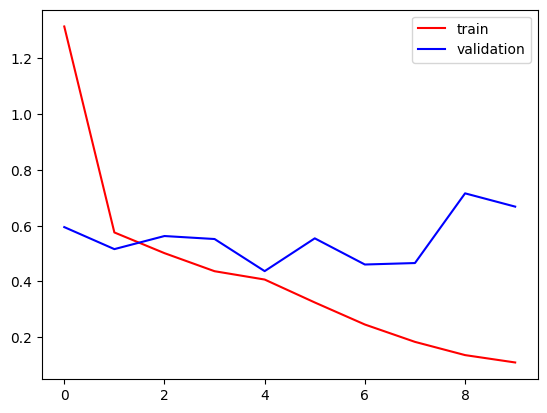

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [ ]:
import cv2


In [ ]:
test_img = cv2.imread('/content/cat.jpg')


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'C:\\Users\\USER\\Desktop\\cat.10.jpg'  # Use double backslashes

try:
    img = Image.open(image_path)
    test_img = np.array(img)

    # Display the image
    plt.imshow(test_img)
    plt.axis('off')  # Hide the axis
    plt.show()

except FileNotFoundError:
    print(f"The file at {image_path} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


The file at C:\Users\USER\Desktop\cat.10.jpg was not found.
